In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

from models.cluster import KMeans as MyKMeans

In [7]:
def sum_of_sequared_errors(X, centroids, labels):
    return np.sum((X - centroids[labels]) ** 2)

In [11]:
X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)


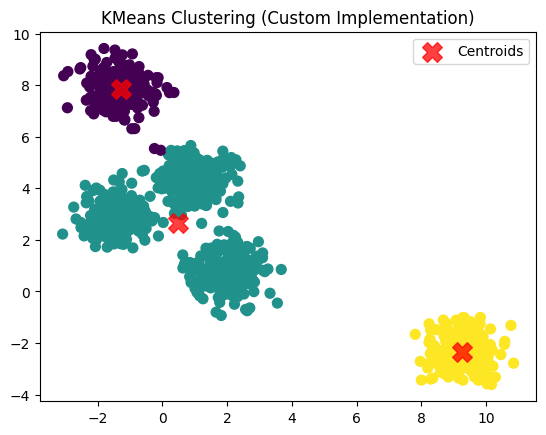

SSE: 3139.543028229992


In [12]:
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

# Vẽ tâm cụm
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("KMeans Clustering (Custom Implementation)")
plt.legend()
plt.show()

print("SSE:", sum_of_sequared_errors(X, model.cluster_centers_, y_pred))

In [12]:
model = MyKMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

# Vẽ tâm cụm
centroids = model.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("KMeans Clustering")
plt.legend()
plt.show()

print("SSE:", sum_of_sequared_errors(X, model.centroids, y_pred))

SSE: 3953.7778333018077


In [11]:
class MyKMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        np.random.seed(0)
        # Khởi tạo ngẫu nhiên tâm cụm
        random_idx = np.random.permutation(len(X))[:self.n_clusters]
        self.centroids = X[random_idx]

        for _ in range(self.max_iter):
            # Bước 1: Gán cụm
            labels = self.predict(X)

            # Bước 2: Tính lại tâm cụm
            new_centroids = np.array([
                X[labels == k].mean(axis=0) if np.any(labels == k) else self.centroids[k]
                for k in range(self.n_clusters)
            ])

            # Kiểm tra hội tụ
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Tính khoảng cách từ mỗi điểm đến từng centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)  # shape: (n_samples, n_clusters)
        return np.argmin(distances, axis=1)  # Nhãn của cụm gần nhất